In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.loadtxt('input/mfeat-pix.txt')
X = X[:200, ]

In [3]:
class PCA():
    """
    Train the model using PCA
    """
    def fit(self, X, normalize=True, explained_variance=0.5):
        if explained_variance > 1 or explained_variance <=0:
            raise ValueError("explained_variance should be in (0, 1]")
        if normalize:
            X = (X - np.min(X)) / (np.max(X) - np.min(X))
        
        self.mean_X = np.mean(X, axis=0)
        self.centered_X = X - self.mean_X
        
        self.covariance_X = np.dot(self.centered_X.T, self.centered_X) / X.shape[0]
        
        # perform SVD on the covariance matrix
        self.components, self.singular_values, v = np.linalg.svd(self.covariance_X)
        
        # sort sigular values and components
        idx = np.argsort(self.singular_values)[::-1]
        self.singular_values = self.singular_values[idx]
        self.components = self.components[:, idx]
        
        # if explained_variance is one, take all components
        if explained_variance == 1:
            idx = self.components.shape[1] - 1
        else:
            # cumulative probabilities for singular values
            cum_prob = np.cumsum(self.singular_values) / sum(self.singular_values)
            # find the index where elements should be inserted to maintain order
            idx = np.searchsorted(cum_prob, explained_variance)
    
        self.reduced_components = self.components[:, 0:idx+1]
        self.encoded_X = np.dot(self.centered_X, self.reduced_components)
        
        self.decoded_X = np.dot(self.encoded_X, self.reduced_components.T) + self.mean_X 
    
    def plot_(self, index=None):
        """
        Plot decoded digits
        """
        if index is None:
            index = [i for i in range(self.decoded_X.shape[0])]
        
        for i in index:
            plt.subplot(1, len(index), i + 1)
            digit_i = self.decoded_X[i].reshape(16, 15)
            plt.imshow(digit_i, cmap='gray')
            plt.axis('off')
        plt.show()        

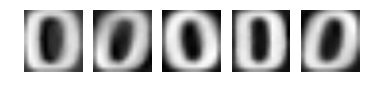

5


In [4]:
var_50 = PCA()
var_50.fit(X, explained_variance=0.5)
var_50.plot_(index = [0, 1, 2, 3, 4])
print(var_50.reduced_components.shape[1])

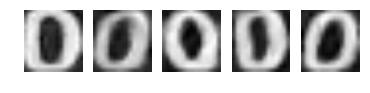

24


In [5]:
var_80 = PCA()
var_80.fit(X, explained_variance=0.8)
var_80.plot_(index = [0, 1, 2, 3, 4])
print(var_80.reduced_components.shape[1])

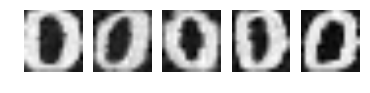

68


In [6]:
var_95 = PCA()
var_95.fit(X, explained_variance=0.95)
var_95.plot_(index = [0, 1, 2, 3, 4])
print(var_95.reduced_components.shape[1])

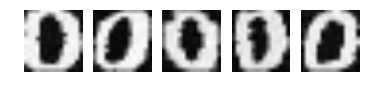

118


In [7]:
var_99 = PCA()
var_99.fit(X, explained_variance=0.99)
var_99.plot_(index = [0, 1, 2, 3, 4])
print(var_99.reduced_components.shape[1])

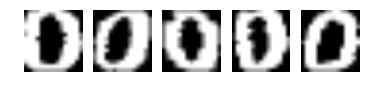

240


In [8]:
var_100 = PCA()
var_100.fit(X, explained_variance=1)
var_100.plot_(index = [0, 1, 2, 3, 4])
print(var_100.reduced_components.shape[1])